In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.getcwd() #gives the current path

'C:\\Users\\user\\AAIC\\EDA'

In [3]:
os.chdir("I:\AAIC files download\habermans-survival-data-set") #Changed location to File directory
print(os.listdir("../habermans-survival-data-set"))  # checking current of directory after directory change


['haberman.csv']


In [4]:
hbrmn = pd.read_csv("../habermans-survival-data-set/haberman.csv",header = None)
print(hbrmn.head())  
print (hbrmn.shape)   # shows data-points and features

    0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1
(306, 4)


In [5]:
# As there is no header, thus we need to apply header
hbrmn.columns = ['Age','Year of operation','Positive_lymph_nodes','Survival_status_after_5_yeras'] 
print(hbrmn.head())

   Age  Year of operation  Positive_lymph_nodes  Survival_status_after_5_yeras
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [6]:
hbrmn["Survival_status_after_5_yeras"].value_counts()
# balanced-dataset vs imbalanced datasets
#haberman is not a balanced dataset as the number of data points for Survival status category are not equally spread.

1    225
2     81
Name: Survival_status_after_5_yeras, dtype: int64

In [7]:
print(hbrmn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                              306 non-null int64
Year of operation                306 non-null int64
Positive_lymph_nodes             306 non-null int64
Survival_status_after_5_yeras    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [8]:
# print the unique valuesof the target column
print(list(hbrmn['Survival_status_after_5_yeras'].unique()))


[1, 2]


In [9]:
#checking for possible nulls in the dataset
hbrmn.isnull().sum()

Age                              0
Year of operation                0
Positive_lymph_nodes             0
Survival_status_after_5_yeras    0
dtype: int64

In [10]:
# changed the datatype of Survival_status_after_5_yeras column
hbrmn['Survival_status_after_5_yeras'] = hbrmn['Survival_status_after_5_yeras'].apply(lambda y: 'Survived' if y == 1 else 'Died')
#print(hbrmn.info())

# Alternate approch: modify the target column values to be meaningful as well as categorical
#hbrmn['survival_status_after_5_years'] = hbrmn['survival_status_after_5_years'].map({1:"yes", 2:"no"})
#hbrmn['survival_status_after_5_years'] = hbrmn['survival_status_after_5_years'].astype('category')

In [67]:

print("*"*15 +"Basic Information Of DataSet","*"*15)
print(hbrmn.info()) # #attributes, #entries
print("*"*15 +"Description Of DataSet","*"*15)
print(hbrmn.describe(include='all')) #descritption of the dataset such as count,mean,std,min,max etc.
#Note: By default, the describe() method won’t include categorical variable for calculating the descriptive statistics.
#To show the descriptive statistics, we have to use ‘include’ parameter.

# include descriptive statistics for categorical columns alsohaberman.describe(include='all')
#print("No. of people survived after 5 years of operation ",[hbrmn["Age"].between(0,100)][hbrmn.["Survival_status_after_5_yeras"] == 'survived'].count())
#no. of people who survived more than 5 years

# find the count of unique values in the last column
print(hbrmn.iloc[:,-1].value_counts(normalize = True))
#sns.set()
#style.use("ggplot")
#sns.set_style("whitegrid")


***************Basic Information Of DataSet ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                              306 non-null int64
Year of operation                306 non-null int64
Positive_lymph_nodes             306 non-null int64
Survival_status_after_5_yeras    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB
None
***************Description Of DataSet ***************
               Age  Year of operation  Positive_lymph_nodes  \
count   306.000000         306.000000            306.000000   
unique         NaN                NaN                   NaN   
top            NaN                NaN                   NaN   
freq           NaN                NaN                   NaN   
mean     52.457516          62.852941              4.026144   
std      10.803452           3.249405              7.189654   
min      30.000000          58.000000              0.000000   
25%      44.00

### Observations:
* The age of the patients vary from 30 to 83 with the median of 52.
* Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes 
* The dataset contains only a small number of records (306). 
* The target column is imbalanced with 73% of values are 'yes'

## 4. Objective

* To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

***Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.***

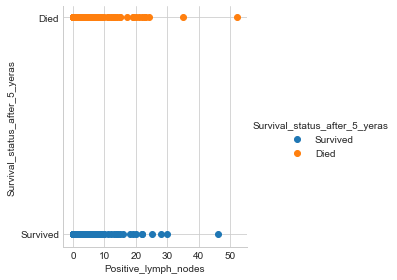

In [12]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(hbrmn, hue="Survival_status_after_5_yeras", size=4) \
   .map(plt.scatter, "Positive_lymph_nodes", "Survival_status_after_5_yeras") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. If Positive_lymph_nodes <30, Survival chance after 5 years are clittle bit better.
2. If Positive_lymph_nodes >30, Survival status after 5 years are much lesser.



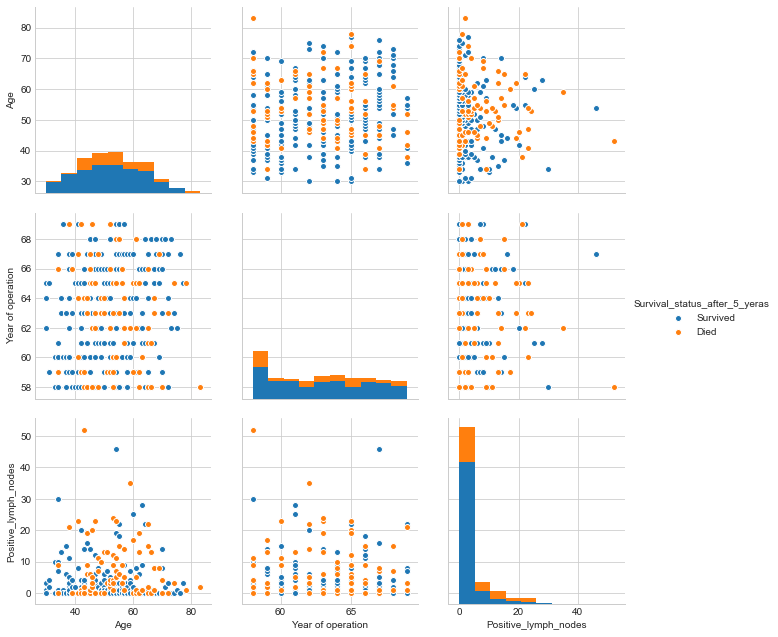

In [13]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hbrmn, hue="Survival_status_after_5_yeras", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observation(s):**
1. Both the survival statuses are quite mixed in the above pair plots. To classify them clearly we need to do univarate analysis.


***Perform Uni-variate analysis (PDF, CDF, Boxplot, Voilin plots) to see if combinations of features are useful in classfication.***

** Histogram, PDF, CDF**

I:\Anaconda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


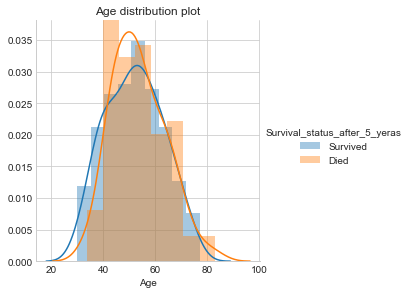

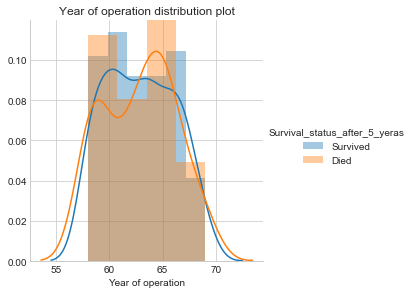

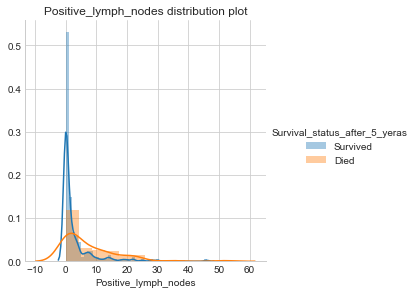

In [68]:
### Density Plot(with Gaussian Kernel smoothing/density estimation)and Histogram--distplot
sns.FacetGrid(hbrmn, hue="Survival_status_after_5_yeras", size=4) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title('Age distribution plot')
#plt.show();

sns.FacetGrid(hbrmn, hue="Survival_status_after_5_yeras", size=4) \
   .map(sns.distplot, "Year of operation") \
   .add_legend();
plt.title('Year of operation distribution plot')
#plt.show();

sns.FacetGrid(hbrmn, hue="Survival_status_after_5_yeras", size=4) \
   .map(sns.distplot, "Positive_lymph_nodes") \
   .add_legend();
plt.title('Positive_lymph_nodes distribution plot')
plt.show();


**Observation(s):**
1. For Age and Year of operation distribution plots are inconclusive as they are heavily overlapping. From positive lymph node distribution it can be said that the survival probability of a patient with 0 positive lymph node is higher than the patient having more than zero +lymph nodes.

Probability Density of People Survived [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Probability Density of People Died  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Cummulative Density of People Survived   [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
Cummulative Density of People Died   [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
Probability Density of People Survived [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Probability Density of People Died  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Cummulative Density of People Survived   [0.18666667 0.29333333 0.39555556 0.46666667 0.564444

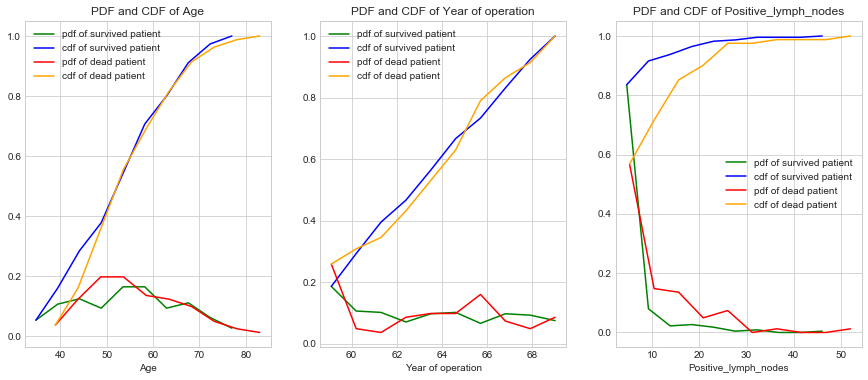

In [32]:
#Ref:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#Probability Density Function and Cummulative Density Functioon
#plt.close();
sns.set_style("whitegrid");
plt.figure(figsize = (15,6))
for idx,features in enumerate(hbrmn.columns[:-1]):
    plt.subplot(1,3,idx+1)    # subplot in 1 row,3 columns,idx(position of subplot) will varry with for loop.
    #Survived People Probability Distribution 
    counts_survived,bins_edges_survived = np.histogram(hbrmn[features][hbrmn['Survival_status_after_5_yeras'] == 'Survived'],bins = 10, density = True)
    pdf_survived = counts_survived/sum(counts_survived)
    cdf_survived = np.cumsum(pdf_survived)
    #Died People Probability Distribution 
    counts_died, bins_edges_died = np.histogram(hbrmn[features][hbrmn['Survival_status_after_5_yeras'] == 'Died'], bins = 10, density = True)
    pdf_died = counts_died/sum(counts_died)
    cdf_died = np.cumsum(pdf_died)
    
    #print(Fore.GREEN + "*"*20 + Style.RESET_ALL + "  "+features.upper()+"  "+Fore.GREEN + "*"*20 + Style.RESET_ALL)
    print ("Probability Density of People Survived" ,pdf_survived)
    print ('Probability Density of People Died ', pdf_died)
    print ('Cummulative Density of People Survived  ', cdf_survived)
    print ('Cummulative Density of People Died  ', cdf_died)
    
    #Graph Plotting.
    plt.title("PDF and CDF of "+features)
    plt.plot(bins_edges_survived[1:],pdf_survived, color = 'green',label = 'pdf of survived patient')
    plt.plot(bins_edges_survived[1:],cdf_survived, color = 'blue',label = 'cdf of survived patient')
    plt.plot(bins_edges_died[1:],pdf_died, color = 'red', label = 'pdf of dead patient')
    plt.plot(bins_edges_died[1:],cdf_died, color = 'orange', label = 'cdf of dead patient')
    plt.xlabel(features)
    plt.legend()
plt.show()

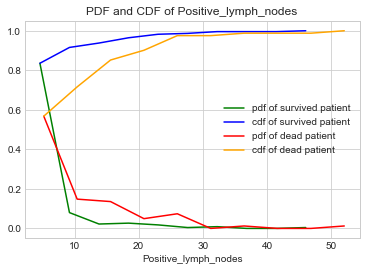

In [39]:
##publish this
#Survived People Probability Distribution
features = 'Positive_lymph_nodes'
counts_survived,bins_edges_survived = np.histogram(hbrmn[features][hbrmn['Survival_status_after_5_yeras'] == 'Survived'],bins = 10, density = True)
pdf_survived = counts_survived/sum(counts_survived)
cdf_survived = np.cumsum(pdf_survived)
#Died People Probability Distribution 
counts_died, bins_edges_died = np.histogram(hbrmn[features][hbrmn['Survival_status_after_5_yeras'] == 'Died'], bins = 10, density = True)
pdf_died = counts_died/sum(counts_died)
cdf_died = np.cumsum(pdf_died)
#Graph Plotting.
plt.title("PDF and CDF of "+features)
plt.plot(bins_edges_survived[1:],pdf_survived, color = 'green',label = 'pdf of survived patient')
plt.plot(bins_edges_survived[1:],cdf_survived, color = 'blue',label = 'cdf of survived patient')
plt.plot(bins_edges_died[1:],pdf_died, color = 'red', label = 'pdf of dead patient')
plt.plot(bins_edges_died[1:],cdf_died, color = 'orange', label = 'cdf of dead patient')
plt.xlabel(features)
plt.legend()
plt.show()

**Observation(s):**
1. Similar to histograms, plots are inconclusive as they are heavily overlapping. If positive lymph nodes <5(approx) then survival chances are high. If positive lymph nodes >5 and <9(approx) then survival chances falls dractically. Beyond 10, the chances of survival are really low.

** Box plot and Whiskers :**

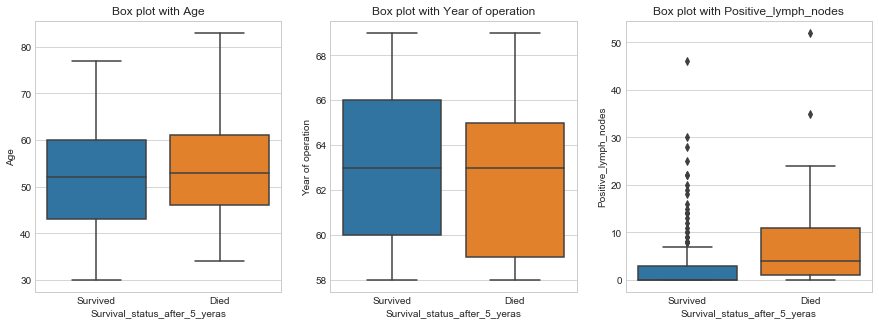

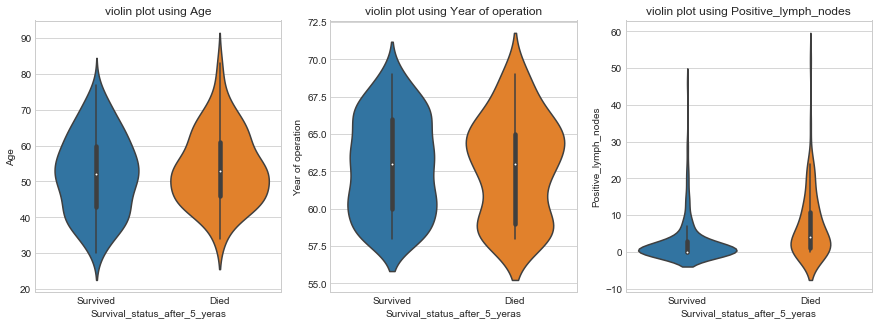

In [63]:
#Box plot with wishkers
fig,axes = plt.subplots(1,3,figsize = (15,5))
for idx, features in enumerate(hbrmn.columns[:-1]):
    sns.boxplot(x = 'Survival_status_after_5_yeras', y = features, data = hbrmn, ax = axes[idx]).set_title("Box plot with "+features)
plt.show()

#Violin Plot
fig,axes = plt.subplots(1,3,figsize = (15,5))
for idx, features in enumerate(hbrmn.columns[:-1]):
    sns.violinplot(x = 'Survival_status_after_5_yeras', y = features, data = hbrmn, ax = axes[idx]).set_title("violin plot using " +features)

plt.show()

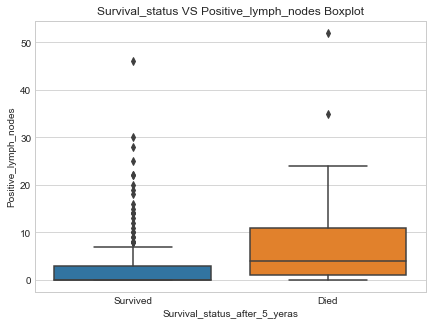

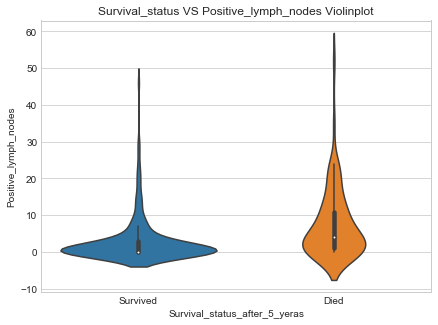

In [65]:
#Box plot with wishkers  ##publish this
plt.figure(figsize = (7,5))
sns.boxplot(x='Survival_status_after_5_yeras',y='Positive_lymph_nodes', data=hbrmn)
plt.title('Survival_status VS Positive_lymph_nodes Boxplot')

plt.figure(figsize = (7,5))
sns.violinplot(x="Survival_status_after_5_yeras", y="Positive_lymph_nodes", data=hbrmn, size=18)
plt.title('Survival_status VS Positive_lymph_nodes Violinplot')
plt.show()

**Observation(s):**
1. From Box plot it can be said that, when #positive lymph node <0.3(approx) no patient died.
2. From violin plot it can be said that, when #positive lymph node <8(approx), patient's survival chances are high.

# Final Thoughts :

1. If #positive lymph node <0.3(approx) no patient died.
2. Survival probability of a patient with 0 positive lymph node is higher than the patient having > 0  positive lymph   nodes.